In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import PolynomialFeatures , MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import probplot

In [16]:
stock_exch = pd.read_csv('indexProcessed.csv')
stock_exch.loc[:,['Date']] = pd.to_datetime(stock_exch['Date'])
stock_exch.set_index('Date',inplace=True)
stock_exch = stock_exch.loc[stock_exch.index>'1980-01-01']

In [17]:
NYSE = stock_exch.loc[stock_exch['Index'] == 'NYA'].copy()
NAS = stock_exch.loc[stock_exch['Index'] == 'IXIC'].copy()
DAX = stock_exch.loc[stock_exch['Index'] == 'GDAXI'].copy()
HSI = stock_exch.loc[stock_exch['Index'] == 'HSI'].copy()

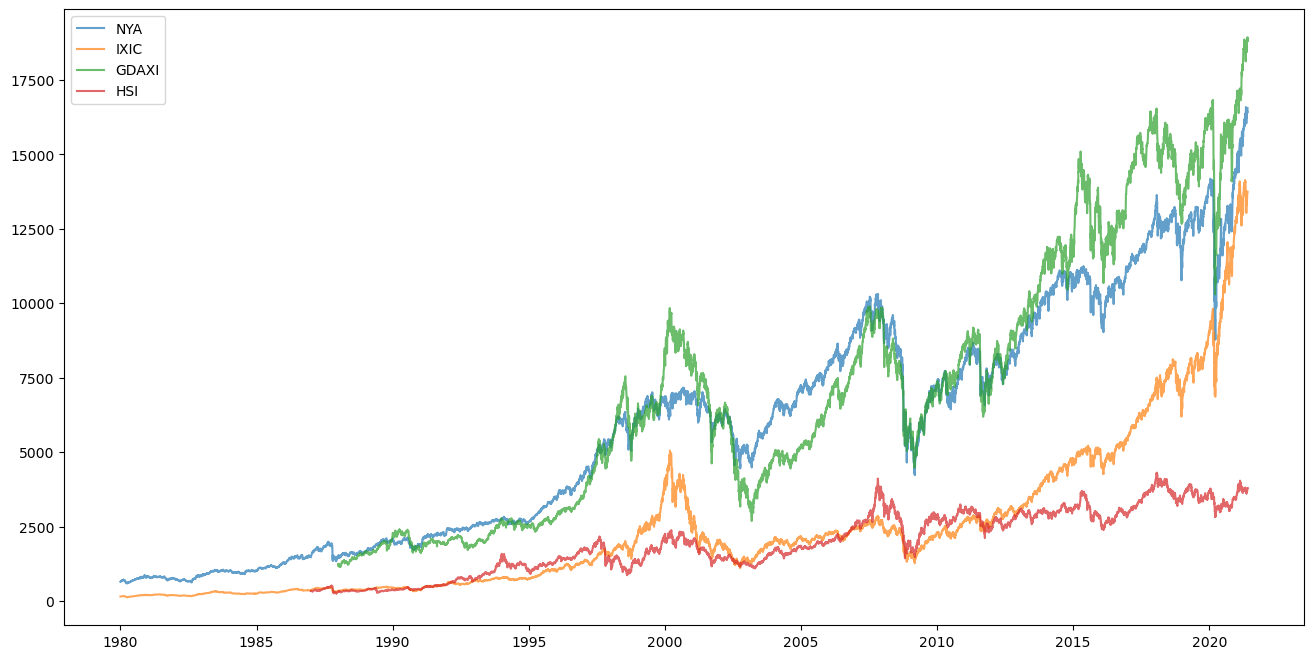

In [18]:
fig , ax = plt.subplots(figsize=(16,8))

tickers = [NYSE,NAS,DAX,HSI]

for ticker in tickers:
    x= ticker.index
    ax.plot(ticker['CloseUSD'],label=ticker['Index'].iloc[0],alpha=0.7)

plt.legend()

plt.show()

In [19]:
display(NAS.describe())
display(DAX.describe())
display(NYSE.describe())
display(HSI.describe())

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,1.044200e+04,10442.000000
mean,2389.848515,2405.675562,2371.567706,2389.702479,2389.702479,1.204989e+09,2389.702479
std,2572.924153,2589.628481,2553.470796,2573.014241,2573.014241,1.118029e+09,2573.014241
min,124.089996,124.089996,124.089996,124.089996,124.089996,0.000000e+00,124.089996
25%,446.500000,448.000000,444.924996,446.324990,446.324990,1.460275e+08,446.324990
50%,1775.679993,1787.919983,1760.039978,1775.054993,1775.054993,1.319465e+09,1775.054993
75%,2862.647522,2878.412475,2832.832520,2860.477478,2860.477478,1.933292e+09,2860.477478
max,14204.509770,14211.570310,14064.280270,14138.780270,14138.780270,1.110216e+10,14138.780270


,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8.438000e+03,8438.000000
mean,5915.549220,5956.941632,5869.720949,5914.846717,5914.846717,6.830384e+07,7216.112995
std,3649.999809,3671.929430,3625.892186,3649.624493,3649.624493,6.475934e+07,4452.541882
min,936.000000,936.000000,936.000000,936.000000,936.000000,0.000000e+00,1141.920000
25%,2513.420044,2530.242431,2492.747559,2513.614991,2513.614991,0.000000e+00,3066.610288
50%,5404.735108,5453.320069,5352.900147,5401.109863,5401.109863,7.312590e+07,6589.354033
75%,7916.622436,7965.574951,7859.397461,7920.977417,7920.977417,1.068676e+08,9663.592448
max,15548.290040,15568.599610,15465.089840,15519.980470,15519.980470,5.101956e+08,18934.376173


,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,1.044200e+04,10442.000000
mean,5760.080236,5782.063124,5735.927248,5760.609908,5760.609908,1.623587e+09,5760.609908
std,3920.029462,3940.757013,3897.332633,3920.554728,3920.554728,1.957275e+09,3920.554728
min,584.729980,584.729980,584.729980,584.729980,584.729980,0.000000e+00,584.729980
25%,1979.769989,1979.769989,1979.769989,1979.769989,1979.769989,0.000000e+00,1979.769989
50%,5929.155029,5952.375000,5899.189941,5931.385009,5931.385009,0.000000e+00,5931.385009
75%,8450.792724,8491.905029,8395.869629,8453.827148,8453.827148,3.348388e+09,8453.827148
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,1.145623e+10,16590.429690


,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8.492000e+03,8492.000000
mean,15206.355607,15303.626762,15091.048791,15200.605629,15200.605629,8.430191e+08,1976.078732
std,8134.381116,8176.760721,8076.816076,8126.747907,8126.747907,1.027671e+09,1056.477228
min,1950.500000,1950.500000,1894.900024,1894.900024,1894.900024,0.000000e+00,246.337003
25%,9261.092286,9334.850342,9193.675293,9258.762695,9258.762695,0.000000e+00,1203.639150
50%,14198.504885,14288.850100,14088.850100,14200.129885,14200.129885,2.791826e+08,1846.016885
75%,22494.959957,22600.484867,22327.009765,22464.002443,22464.002443,1.596115e+09,2920.320318
max,33335.480470,33484.078130,32897.039060,33154.121090,33154.121090,9.799120e+09,4310.035742


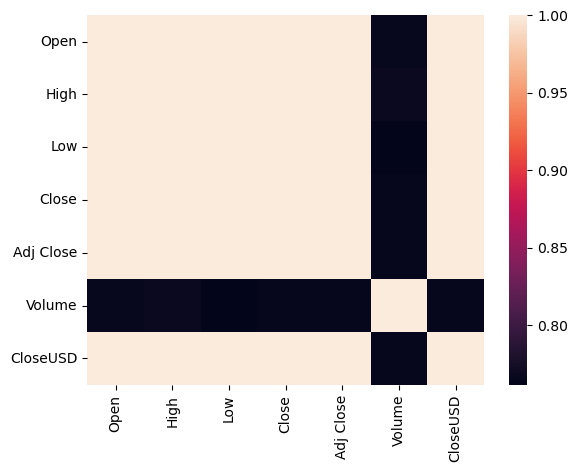

In [20]:
sns.heatmap(NYSE.corr())
plt.savefig("index_corr.png",dpi=256)
plt.show()

In [21]:
missing_NYSE = len(pd.bdate_range(start=NYSE.index[0],end=NYSE.index[-1]).difference(NYSE.index))
missing_NAS = len(pd.bdate_range(start=NAS.index[0],end=NAS.index[-1]).difference(NAS.index))
missing_DAX = len(pd.bdate_range(start=DAX.index[0],end=DAX.index[-1]).difference(DAX.index))
missing_HSI = len(pd.bdate_range(start=HSI.index[0],end=HSI.index[-1]).difference(HSI.index))

print(missing_NYSE,missing_NAS,missing_DAX,missing_HSI)
#There are some days missing, but a few hundred over 50 years is not significant enough. Also I can attribute these days to 
#national holidaysa when the market wouldn't be open anyway.

361 361 281 487


In [22]:
def MACD(df):
    
    ticker = df.copy()
    ticker['9d_MA'] = ticker.loc[:,'CloseUSD'].rolling(9).mean()
    ticker['12d_MA'] = ticker.loc[:,'CloseUSD'].rolling(12).mean()
    ticker['26d_MA'] = ticker.loc[:,'CloseUSD'].rolling(26).mean()
    ticker['55d_MA'] = ticker.loc[:,'CloseUSD'].rolling(55).mean()
    ticker['200d_MA'] = ticker.loc[:,'CloseUSD'].rolling(200).mean()
    ticker['MACD'] = ticker['12d_MA'] - ticker['26d_MA']
    
    return ticker

def gain_loss(df):
    ticker = df.copy()
    
    ticker['gain'] = 0
    ticker['loss'] = 0
    
    for i in range(len(ticker)):
        
        x = ticker.iloc[i]['Close'] - ticker.iloc[i]['Open']
        if x > 0:
            ticker.loc[ticker.index[i],'gain'] = abs(x)
        if x < 0:
            ticker.loc[ticker.index[i],'loss'] = abs(x)
            
    return ticker

def average_increase(df):
    
    try:
        df['gain']
    except KeyError:
        print("Generate gain vs loss columns first")
        return 0
    
    ticker = df.copy()
    ticker['increase'] = ticker['gain'] - ticker['loss']
    
    periods = [3,8,21,55,200]
    
    for p in periods:
        ticker[f'{p}d_av_inc'] = ticker.loc[:,'increase'].rolling(p).mean()
    return ticker

def RSI_avgain_avloss(df):

    try:
        df['gain']
    except KeyError:
        print("Generate gain and loss first")
        return 0
    
    ticker = df.copy()
    ticker['RSI_avgain'] = 0
    ticker['RSI_avloss'] = 0
    
    ticker.loc[ticker.index[14],'RSI_avgain'] = sum(ticker['gain'].iloc[:14])/14
    ticker.loc[ticker.index[14],'RSI_avloss'] = sum(ticker['loss'].iloc[:14])/14
    
    for i in range(15,len(ticker)):
        ticker.loc[ticker.index[i],'RSI_avgain'] = (ticker.loc[ticker.index[i-1],'RSI_avgain']*13+ticker.loc[ticker.index[i],'gain'])/14
        ticker.loc[ticker.index[i],'RSI_avloss'] = (ticker.loc[ticker.index[i-1],'RSI_avloss']*13+ticker.loc[ticker.index[i],'loss'])/14
        
    return ticker
    
def RSI(df):
    
    try:
        df['RSI_avgain']
    except KeyError:
        print("Generate RSI avgain loss first ")
        return 0
        
    ticker = df.copy()
    ticker['RSI'] = 0

    for i in range(14,len(ticker)):
        #Handling divide by zero error
        if ticker.loc[ticker.index[i],'RSI_avloss'] == 0:
            ticker.loc[ticker.index[i],'RSI'] = 0
        
        else:
            RS = ticker.loc[ticker.index[i],'RSI_avgain']/ticker.loc[ticker.index[i],'RSI_avloss']
            ticker.loc[ticker.index[i],'RSI'] = 100 - (100/(1+RS))

    return ticker
    
def OBV(df):
    
    try:
        df['Volume']
    except KeyError:
        print("Volume column")
        
    ticker = df.copy()
    ticker['OBV'] = 0
    
    #Beginning at 1 because first entry should be zero
    for i in range(1,len(ticker)):
        vol = ticker['Volume'][i]
        prev_obv = ticker['OBV'][i-1]
        if vol > prev_obv:
            ticker.loc[ticker.index[i],'OBV'] = prev_obv + vol
        elif vol < prev_obv:
            ticker.loc[ticker.index[i],'OBV'] = prev_obv - vol
        else:
            ticker.loc[ticker.index[i],'OBV'] = prev_obv

    return ticker
    

In [23]:
def preprocess(df,c=0):
    ticker=df.copy()
    ticker = MACD(ticker)
    ticker = gain_loss(ticker)
    ticker = average_increase(ticker)
    ticker = RSI_avgain_avloss(ticker)
    ticker = RSI(ticker)
    ticker = OBV(ticker)
    ticker['TomorrowCloseUSD'] = ticker.loc[:,'CloseUSD'].shift(-1)
    
    if c == 0:
        #Returns normally distributed colums
        cols = ['MACD','3d_av_inc', '8d_av_inc', '21d_av_inc', '55d_av_inc', '200d_av_inc','RSI', 'TomorrowCloseUSD']
    elif c == 1:
        #Returns non-normal columns
        cols = ['Volume','OBV','9d_MA','12d_MA','26d_MA','55d_MA','200d_MA','TomorrowCloseUSD']
    else:
        cols = ticker.columns 
        
    #Returns the dataframe from the point which is has a 200d average
    #return ticker.loc[ticker.index[np.argmax(np.isnan(ticker['200d_av_inc']) != True):-2],cols]
    
    return ticker.loc[:,cols].dropna()

In [24]:
#This function performs linear regression trained on data up to a specified date, with x_cols as features
#ticker is the preprocessed dataframe for a stock index

def Linear_Regression(ticker,train_size):
    
    scaler = MinMaxScaler()

    X_cols = ticker.columns[:-1]
    date = ticker.index[int(train_size*len(ticker.index))]
    
    #Fitting the scaler on the training set not the test set.
    X_train = scaler.fit_transform(ticker.loc[:date,X_cols])
    y_train = ticker.loc[:date,'TomorrowCloseUSD']

    X_test = scaler.transform(ticker.loc[date:,X_cols])
    y_test = ticker.loc[date:,'TomorrowCloseUSD']

    Lin_reg = LinearRegression().fit(X_train,y_train)

    #print("trainsize, testsize, ", len(X_train),len(X_test))
    #print(Lin_reg.coef_)
    #print(Lin_reg.intercept_)
    train_prediction = (y_train.index ,Lin_reg.predict(X_train))
    train_score = Lin_reg.score(X_train, y_train)
    #print("train score",train_score)
    test_prediction = (y_test.index ,Lin_reg.predict(X_test))
    test_score = Lin_reg.score(X_test, y_test)
    #print("test score", test_score)
    
    #Returning these so we can plot them
    return train_prediction , test_prediction , train_score , test_score

In [25]:
#Attempting polynomial regression
#Train size is between 0 and 1 for a percentage of data used for training

def Polynomial_Regression(ticker,train_size,deg=2):
    
    scaler = MinMaxScaler()
    
    X_cols = ticker.columns[:-1]

    X = ticker.loc[:,X_cols]
    Y = ticker.loc[:,'TomorrowCloseUSD']

    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X)
    
    index = int(train_size*len(X))
    
    X_train = scaler.fit_transform(X_train_poly[:index])
    y_train = Y[:index]

    X_test = scaler.transform(X_train_poly[index:])
    y_test = Y[index:]

    Lin_reg = LinearRegression().fit(X_train,y_train)

    #print(Lin_reg.coef_)
    #print(Lin_reg.intercept_)
    train_prediction = (Y.index[:len(y_train)] ,Lin_reg.predict(X_train))
    train_score = Lin_reg.score(X_train, y_train)
    #print("train_score",train_score)
    test_prediction = (Y.index[len(y_train):],Lin_reg.predict(X_test))
    test_score = Lin_reg.score(X_test, y_test)
    #print("test_score",test_score)

    #Returning these so we can plot them
    return train_prediction , test_prediction, train_score , test_score

In [26]:
#Attempting polynomial regression with LASSO

def Polynomial_Lasso(alpha,ticker,train_size,deg=2):
    
    scaler = MinMaxScaler()
    
    X_cols = ticker.columns[:-1]
    
    X = ticker.loc[:,X_cols]
    Y = ticker.loc[:,'TomorrowCloseUSD']

    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X)
    
    index = int(train_size*len(X))
    
    X_train = scaler.fit_transform(X_train_poly[:index])
    y_train = Y[:index]

    X_test = scaler.transform(X_train_poly[index:])
    y_test = Y[index:]

    Lin_reg = Lasso(alpha=alpha).fit(X_train,y_train)

    #print(Lin_reg.coef_)
    coeffs_reduced = len(Lin_reg.coef_[Lin_reg.coef_==0])/len(Lin_reg.coef_)
    #print(Lin_reg.intercept_)
    train_prediction = (Y.index[:len(y_train)] ,Lin_reg.predict(X_train))
    train_score = Lin_reg.score(X_train, y_train)
    #print(train_score)
    
    test_prediction = (Y.index[len(y_train):],Lin_reg.predict(X_test))
    test_score = Lin_reg.score(X_test, y_test)
    #print(test_score)
    
    #Returning these so we can plot them
    return train_prediction , test_prediction, train_score , test_score, coeffs_reduced

In [27]:
#Attempting polynomial regression with Ridge

def Polynomial_Ridge(alpha,ticker,train_size,deg=2):
    scaler = MinMaxScaler()
    
    X_cols = ticker.columns[:-1]
    
    X = ticker.loc[:,X_cols]
    Y = ticker.loc[:,'TomorrowCloseUSD']

    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X)
    
    index = int(train_size*len(X))
    
    X_train = scaler.fit_transform(X_train_poly[:index])
    y_train = Y[:index]

    X_test = scaler.transform(X_train_poly[index:])
    y_test = Y[index:]

    Lin_reg = Ridge(alpha=alpha).fit(X_train,y_train)
    
    #print(Lin_reg.coef_)
    coeffs_reduced = len(Lin_reg.coef_[Lin_reg.coef_==0])/len(Lin_reg.coef_)
    #print(Lin_reg.intercept_)
    train_prediction = (Y.index[:len(y_train)] ,Lin_reg.predict(X_train))
    train_score = Lin_reg.score(X_train, y_train)
    #print(train_score)
    
    test_prediction = (Y.index[len(y_train):],Lin_reg.predict(X_test))
    test_score = Lin_reg.score(X_test, y_test)
    #print(test_score)
    
    #Returning these so we can plot them
    return train_prediction , test_prediction, train_score , test_score, coeffs_reduced

## Histograms for features

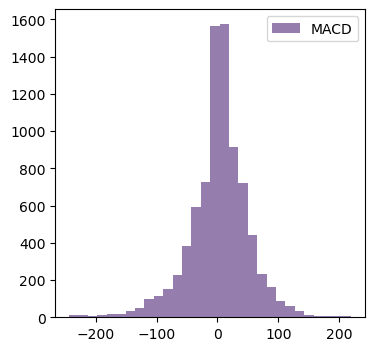

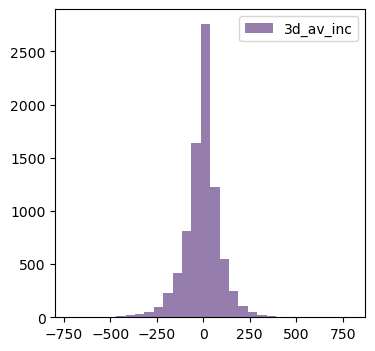

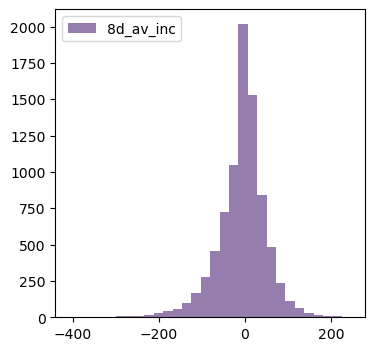

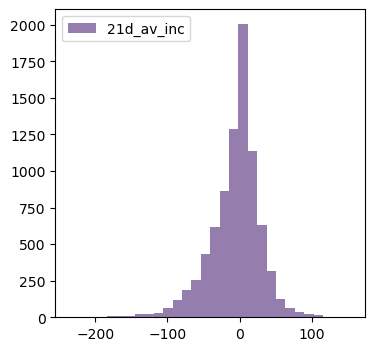

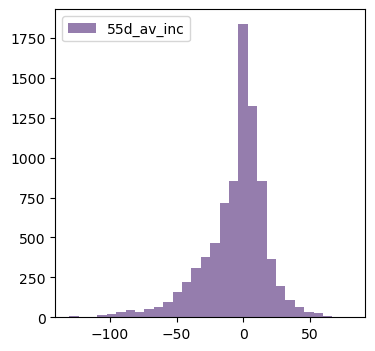

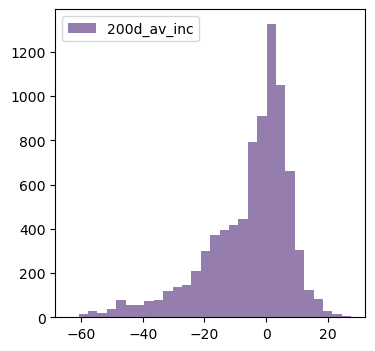

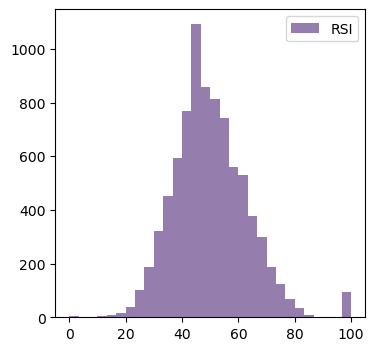

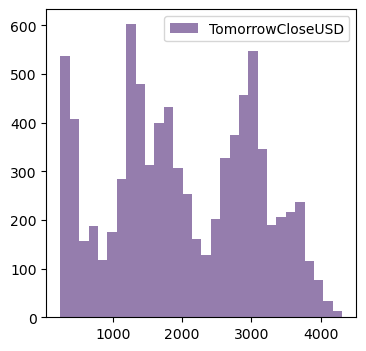

In [29]:
#To generate histograms for indicators. 

HSI_clip = preprocess(HSI,c=0)

HSI_clip = HSI_clip.loc[HSI_clip.index[np.argmax(HSI_clip['RSI']!=0):]]

cols = HSI_clip.columns.to_list()

for col in cols:
    plt.figure(figsize=(4,4))
    plt.hist(HSI_clip[col],bins=30,color='#957DAD',label=col)
    plt.legend()
    plt.savefig(f'{col}_hist.png',dpi=256)
    plt.show()


## Modelling with Oscillating features

In [30]:
#generating our normal features
DAX_clip = preprocess(DAX,c=0)
NAS_clip = preprocess(NAS,c=0)
NYSE_clip = preprocess(NYSE,c=0)
HSI_clip = preprocess(HSI,c=0)

#Removing the data before the first full row (which happens to be where RSI is non-zero)
DAX_clip = DAX_clip.loc[DAX_clip.index[np.argmax(DAX_clip['RSI']!=0):]]
NAS_clip = NAS_clip.loc[NAS_clip.index[np.argmax(NAS_clip['RSI']!=0):]]
NYSE_clip = NYSE_clip.loc[NYSE_clip.index[np.argmax(NYSE_clip['RSI']!=0):]]
HSI_clip = HSI_clip.loc[HSI_clip.index[np.argmax(HSI_clip['RSI']!=0):]]

In [31]:
DAX_corr = DAX_clip.corr()['TomorrowCloseUSD']
NAS_corr = NAS_clip.corr()['TomorrowCloseUSD']
NYSE_corr = NYSE_clip.corr()['TomorrowCloseUSD']
HSI_corr = HSI_clip.corr()['TomorrowCloseUSD']

print("&".join([str(DAX_corr.to_list()[k])[:6] for k in range(len(DAX_corr)) ]))
print("&".join([str(NAS_corr.to_list()[k])[:6] for k in range(len(NAS_corr)) ]))
print("&".join([str(NYSE_corr.to_list()[k])[:6] for k in range(len(NYSE_corr)) ]))
print("&".join([str(HSI_corr.to_list()[k])[:6] for k in range(len(HSI_corr)) ]))

0.1113&0.0166&0.0282&0.0444&0.0734&0.0696&0.0587&1.0
0.2520&0.0184&0.0276&0.0413&0.0768&0.2411&-0.055&1.0
0.1469&0.0302&0.0467&0.0786&0.1021&0.0650&0.0334&1.0
0.0715&-0.059&-0.103&-0.165&-0.230&-0.349&-0.234&1.0


### Hyperparameters

In [32]:
#Testing which value of alpha works the best.

alpha = [1,2,3,4,5,10,20,50,100]

ticker = NAS_clip

ridge_train = []
ridge_test = []
ridge_reduce = []

lasso_train = []
lasso_test = []
lasso_reduce = []

for x in alpha:
    r = Polynomial_Ridge(x,ticker,0.8,deg=2)
    l = Polynomial_Lasso(x,ticker,0.8,deg=2)
    
    ridge_train.append(r[2])
    ridge_test.append(r[3])
    ridge_reduce.append(r[4])
    
    lasso_train.append(l[2])
    lasso_test.append(l[3])
    lasso_reduce.append(l[4])


print("&".join([ str(f)[:7] for f in ridge_train ] ))
print("&".join([ str(f)[:7] for f in ridge_test ] ))
print("&".join([ str(f)[:7] for f in ridge_reduce ] ))

print("&".join([ str(f) for f in lasso_train ] ))
print("&".join([ str(f)[:7] for f in lasso_test ] ))
print("&".join([ str(f)[:7] for f in lasso_reduce ] ))
#As a result I'll probably use alpha=1 further on.

0.42247&0.39016&0.37078&0.35730&0.34699&0.31469&0.27848&0.22015&0.17207
-2.0930&-2.3242&-2.4777&-2.5936&-2.6875&-3.0028&-3.3565&-3.8494&-4.1700
0.02777&0.02777&0.02777&0.02777&0.02777&0.02777&0.02777&0.02777&0.02777
0.36991091399444187&0.32840097849652894&0.29701030822437524&0.27537912828962374&0.2584422002111786&0.16873919582185226&0.04875382878073864&0.0&0.0
-2.5942&-2.8440&-3.0682&-3.2396&-3.3888&-4.1487&-4.6880&-4.5986&-4.5986
0.63888&0.66666&0.72222&0.77777&0.80555&0.88888&0.91666&1.0&1.0


In [33]:
#Testing which degree polynomial performs the best

degree = [1,2,3,4,5]

train_scores = []
test_scores = []

for d in degree:
    
    p = Polynomial_Regression(NAS_clip,0.8,deg=d)
    
    train_scores.append(p[2])
    test_scores.append(p[3])

print("&".join([ str(f)[:7] for f in train_scores ]))
print("&".join([ str(f)[:7] for f in test_scores ]))

0.18900&0.48341&0.63552&0.72821&0.80654
-4.4016&-1.6205&-227.78&-2788.4&-187409


### Models

0.08422181032642018 -15.391168515322143
0.1889021555754402 -4.400245619738222
0.193204840660133 -13.818077485298526
0.09308267309955698 -25.75305086863503


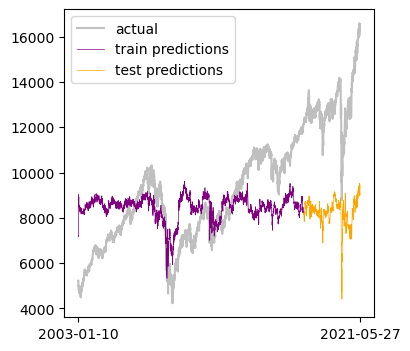

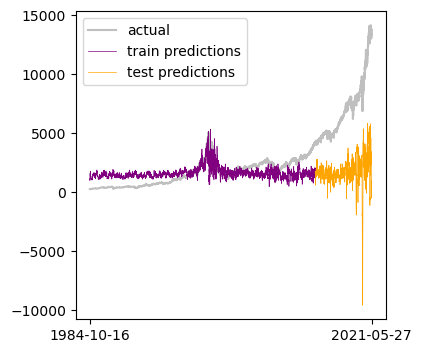

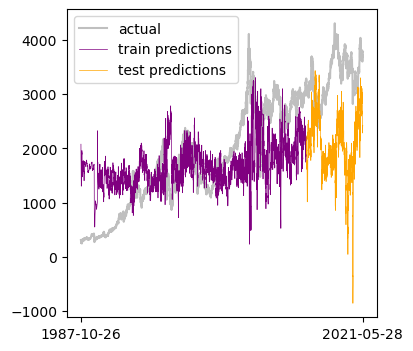

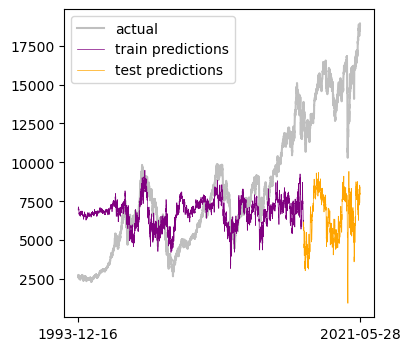

In [34]:
#Linear Regression

indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]
names = ['NYSE','NAS','HSI','DAX']

for i in range(len(indexes)):
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Linear_Regression(ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)
    
    plt.xticks([ticker.index[0],ticker.index[-1]])
    
    plt.legend()
    plt.savefig(f"osc_lin_reg_{names[i]}.png",dpi=256)
    print(train_score,test_score)
    

0.19102526217770066 -14.94287051933545
0.4834158577753722 -1.620530331544908
0.3389892453004075 -11.628413205284104
0.3859341787828259 -26.02700659525891


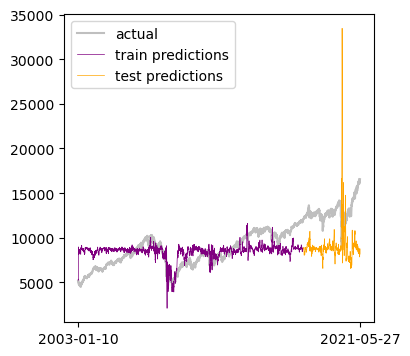

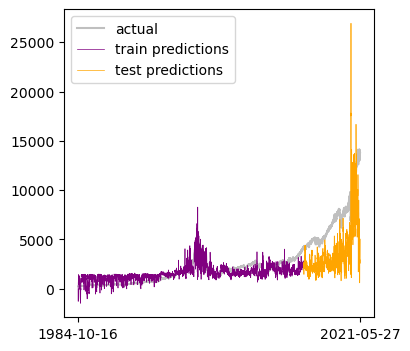

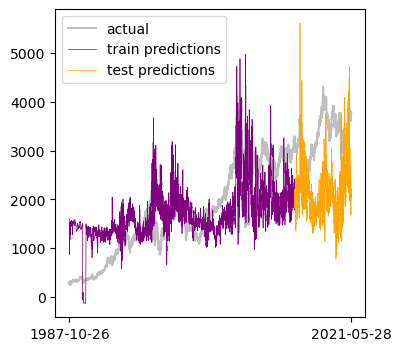

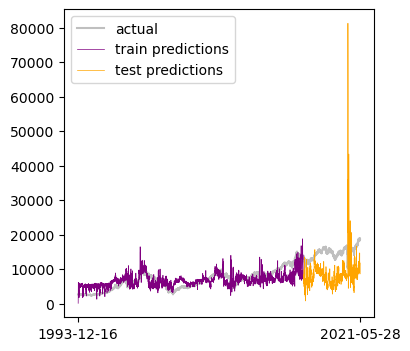

In [35]:
indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]

for i in range(len(indexes)):
    
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Polynomial_Regression(ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)

    plt.xticks([ticker.index[0],ticker.index[-1]])
    
    plt.legend()
    plt.savefig(f"osc_poly_reg_{names[i]}.png",dpi=256)
    print(train_score,test_score)

0.17114800377928796 -14.350618993671755
0.36991091399444187 -2.5942513859199052
0.2929635545076109 -12.424800690935188
0.3217444005054676 -26.245408998993756


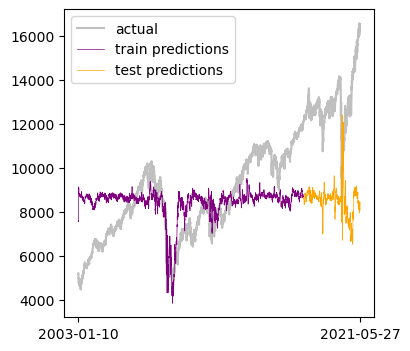

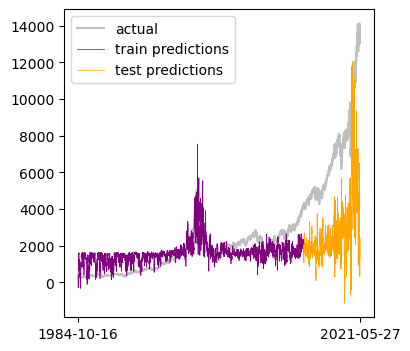

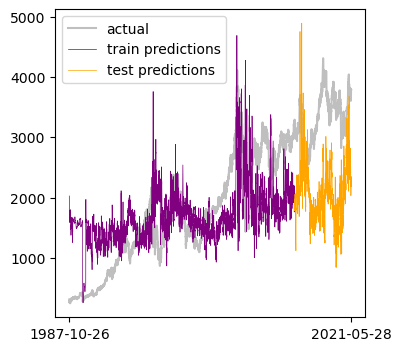

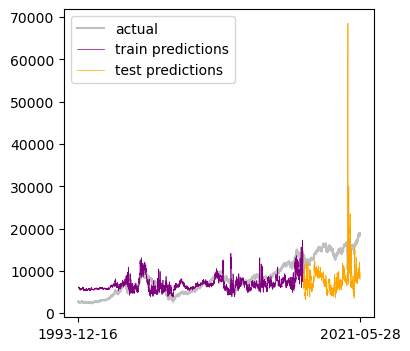

In [36]:
indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]

for i in range(len(indexes)):
    
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Polynomial_Lasso(1,ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)
    
    plt.xticks([ticker.index[0],ticker.index[-1]])
   
    plt.legend()
    plt.savefig(f"osc_poly_las_{names[i]}.png",dpi=256)
    print(train_score,test_score)

0.17565751905708882 -14.020952309805995
0.4224784890179889 -2.0930518234382114
0.3212119729988715 -11.926185490219899
0.32185826867475364 -25.009937486262505


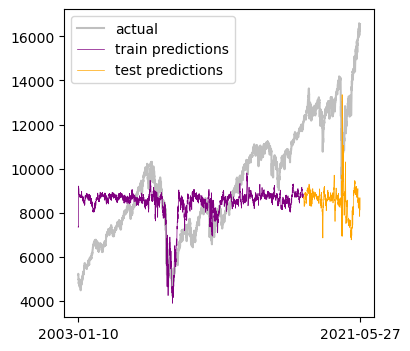

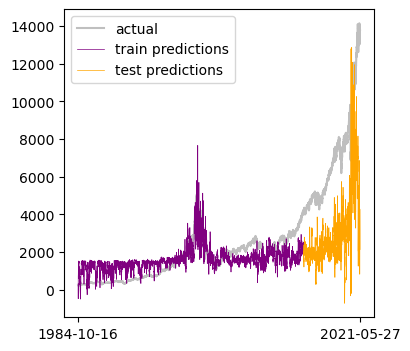

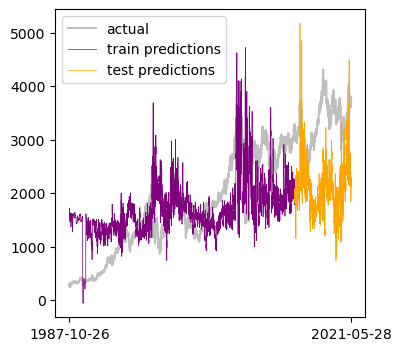

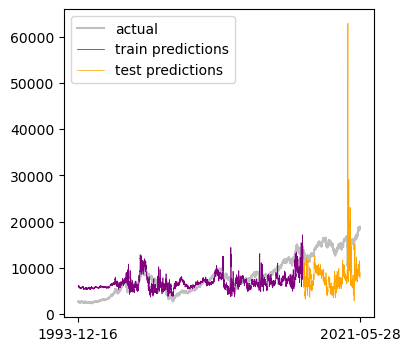

In [37]:
indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]

for i in range(len(indexes)):
    
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Polynomial_Ridge(1,ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)
    
    plt.xticks([ticker.index[0],ticker.index[-1]])
    
    plt.legend()
    plt.savefig(f"osc_poly_rid_{names[i]}.png",dpi=256)
    print(train_score,test_score)

## Modelling non-oscillating data

In [38]:
#generating our normal features
DAX_clip = preprocess(DAX,c=1)
NAS_clip = preprocess(NAS,c=1)
NYSE_clip = preprocess(NYSE,c=1)
HSI_clip = preprocess(HSI,c=1)

DAX_clip = DAX_clip.loc[DAX_clip.index[np.argmax(DAX_clip['Volume']!=0):]]
NAS_clip = NAS_clip.loc[NAS_clip.index[np.argmax(NAS_clip['Volume']!=0):]]
NYSE_clip = NYSE_clip.loc[NYSE_clip.index[np.argmax(NYSE_clip['Volume']!=0):]]
HSI_clip = HSI_clip.loc[HSI_clip.index[np.argmax(HSI_clip['Volume']!=0):]]

In [39]:
DAX_corr = DAX_clip.corr()['TomorrowCloseUSD']
NAS_corr = NAS_clip.corr()['TomorrowCloseUSD']
NYSE_corr = NYSE_clip.corr()['TomorrowCloseUSD']
HSI_corr = HSI_clip.corr()['TomorrowCloseUSD']

print("&".join([str(DAX_corr.to_list()[k])[:6] for k in range(len(DAX_corr)) ]))
print("&".join([str(NAS_corr.to_list()[k])[:6] for k in range(len(NAS_corr)) ]))
print("&".join([str(NYSE_corr.to_list()[k])[:6] for k in range(len(NYSE_corr)) ]))
print("&".join([str(HSI_corr.to_list()[k])[:6] for k in range(len(HSI_corr)) ]))

-0.159&-0.088&0.9979&0.9973&0.9946&0.9890&0.9681&1.0
0.7844&0.5639&0.9993&0.9992&0.9984&0.9969&0.9906&1.0
0.2983&0.1593&0.9975&0.9968&0.9936&0.9872&0.9572&1.0
0.6143&0.4229&0.9959&0.9949&0.9897&0.9787&0.9224&1.0


## Models

In [40]:
#Testing which value of alpha works the best.

alpha = [1,2,3,4,5,10,20,50,100]

ticker = NAS_clip

ridge_train = []
ridge_test = []
ridge_reduce = []

lasso_train = []
lasso_test = []
lasso_reduce = []

for x in alpha:
    r = Polynomial_Ridge(x,ticker,0.8,deg=2)
    l = Polynomial_Lasso(x,ticker,0.8,deg=2)
    
    ridge_train.append(r[2])
    ridge_test.append(r[3])
    ridge_reduce.append(r[4])
    
    lasso_train.append(l[2])
    lasso_test.append(l[3])
    lasso_reduce.append(l[4])


print("&".join([ str(f)[:7] for f in ridge_train ] ))
print("&".join([ str(f)[:7] for f in ridge_test ] ))
print("&".join([ str(f)[:7] for f in ridge_reduce ] ))

print("&".join([ str(f) for f in lasso_train ] ))
print("&".join([ str(f)[:7] for f in lasso_test ] ))
print("&".join([ str(f)[:7] for f in lasso_reduce ] ))
#As a result I'll probably use alpha=1 further on.

0.99692&0.99671&0.99654&0.99639&0.99624&0.99555&0.99412&0.98962&0.98341
0.99013&0.98868&0.98449&0.97788&0.96914&0.90074&0.68809&-0.1048&-1.1994
0.02777&0.02777&0.02777&0.02777&0.02777&0.02777&0.02777&0.02777&0.02777
0.9968943118594741&0.9968365100250994&0.996740173634475&0.9966032313576704&0.9963886560366878&0.9944128637812328&0.9866316463455198&0.9373922606335974&0.7984756329765432
0.99505&0.99453&0.99380&0.99286&0.99161&0.98148&0.94267&0.68914&-0.0995
0.97222&0.97222&0.97222&0.94444&0.91666&0.88888&0.88888&0.94444&0.94444


In [41]:
#Testing which degree polynomial performs the best

degree = [1,2,3,4,5]

train_scores = []
test_scores = []

for d in degree:
    
    p = Polynomial_Regression(NAS_clip,0.8,deg=d)
    
    train_scores.append(p[2])
    test_scores.append(p[3])

print("&".join([ str(f)[:7] for f in train_scores ]))
print("&".join([ str(f)[:7] for f in test_scores ]))

0.99730&0.99752&0.99800&0.99845&0.99899
0.99603&0.98973&0.40453&-69.289&-8439.6


0.9939990558580025 0.9583774696344272
0.9973020462881687 0.9960381699011546
0.9918807510783354 0.9229735444338247
0.9948800520834321 0.9369590784912732


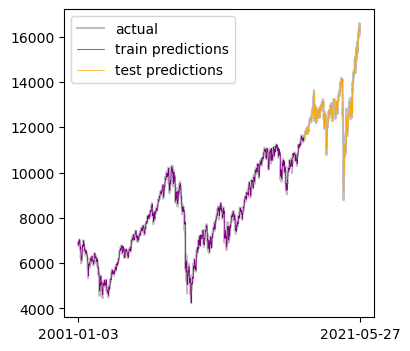

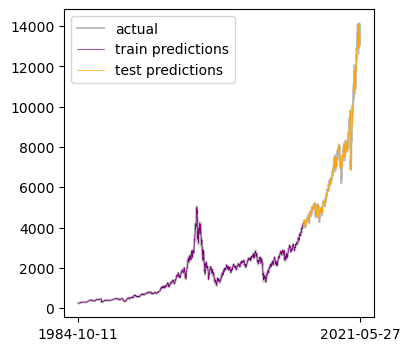

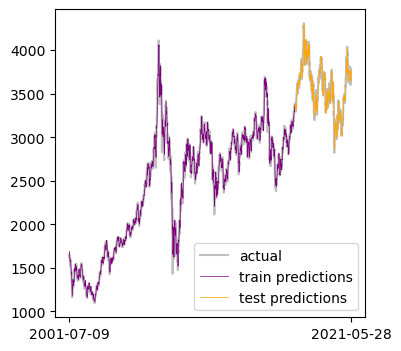

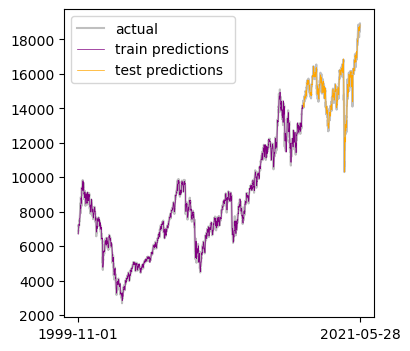

In [42]:
#Linear Regression

indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]
names = ['NYSE','NAS','HSI','DAX']

for i in range(len(indexes)):
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Linear_Regression(ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)
    
    plt.xticks([ticker.index[0],ticker.index[-1]])

    plt.legend()
    plt.savefig(f"exp_lin_reg_{names[i]}.png",dpi=256)
    print(train_score,test_score)
    

0.9943498890503841 0.9425356747179436
0.997523601048851 0.9897351543624244
0.9922988763653735 0.9214554568881325
0.9950717501246881 0.9340415706853696


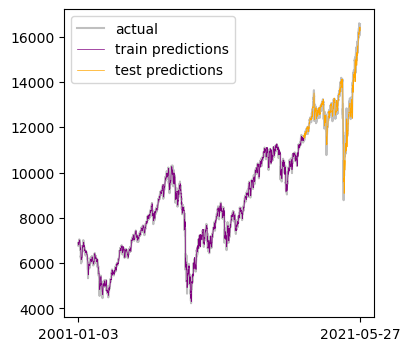

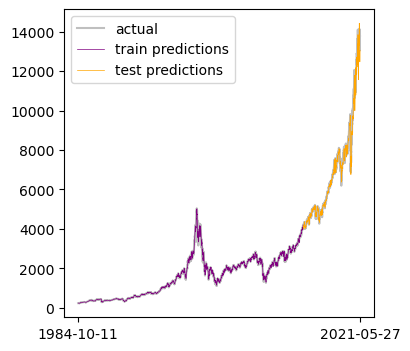

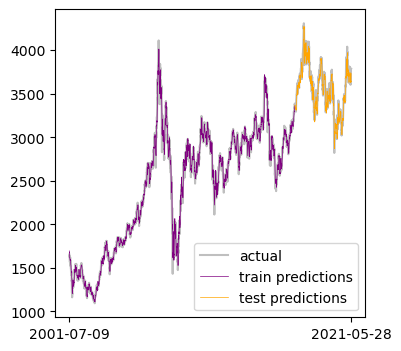

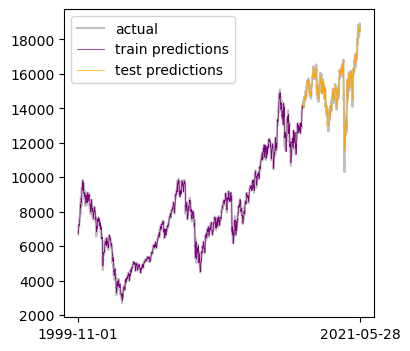

In [43]:
indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]

for i in range(len(indexes)):
    
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Polynomial_Regression(ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)

    plt.xticks([ticker.index[0],ticker.index[-1]])
    
    plt.legend()
    plt.savefig(f"exp_poly_reg_{names[i]}.png",dpi=256)
    print(train_score,test_score)

0.993361420323787 0.9493167585690849
0.9968943118594741 0.9950559605251107
0.9904051705929839 0.9142728907212202
0.9942355080570283 0.9257883334976356


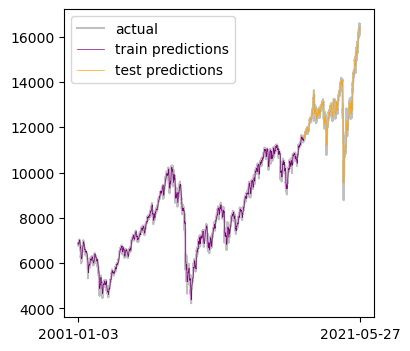

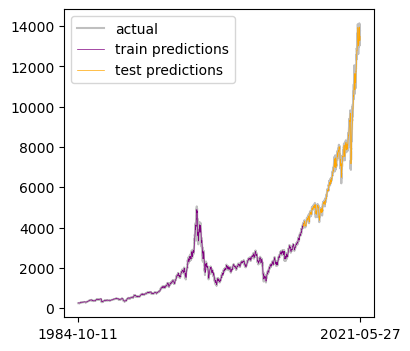

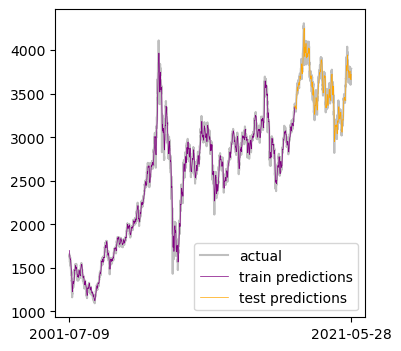

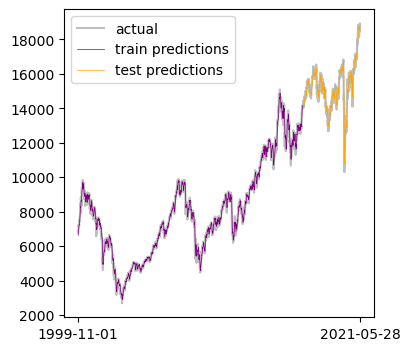

In [44]:
indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]

for i in range(len(indexes)):
    
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Polynomial_Lasso(1,ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)
    
    plt.xticks([ticker.index[0],ticker.index[-1]])
    
    plt.legend()
    plt.savefig(f"exp_poly_las_{names[i]}.png",dpi=256)
    print(train_score,test_score)

0.9933182344032238 0.9415527524110745
0.9969219711250443 0.9901392373895435
0.9907470771245616 0.9113863290119858
0.993925845485349 0.9248495295480778


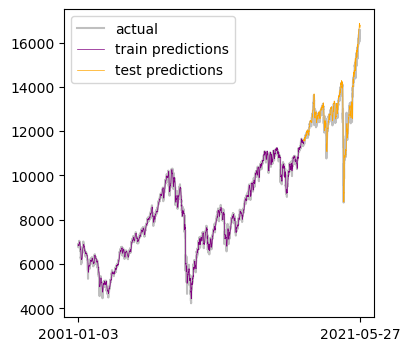

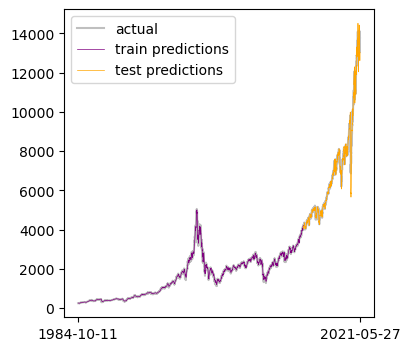

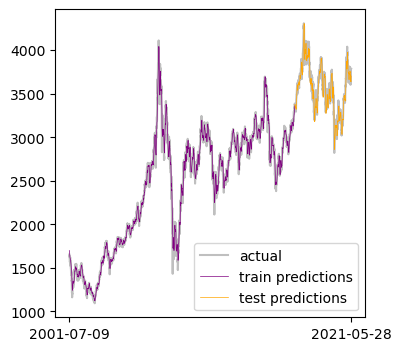

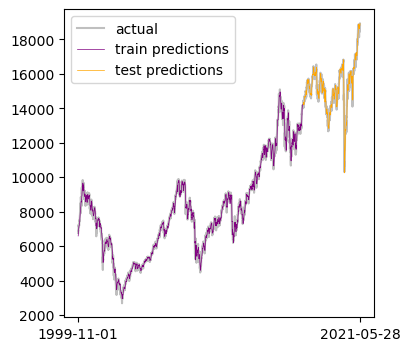

In [45]:
indexes = [NYSE_clip,NAS_clip,HSI_clip,DAX_clip]

for i in range(len(indexes)):
    
    ticker = indexes[i]
    
    plt.figure(figsize=(4,4))
    
    r = Polynomial_Ridge(1,ticker,0.8)
    train_pred = r[0]
    test_pred = r[1]
    train_score = r[2]
    test_score = r[3]
    
    plt.plot(ticker.index,ticker['TomorrowCloseUSD'],label='actual',zorder=0,color='grey',alpha=0.5)
    plt.plot(train_pred[0],train_pred[1],label='train predictions',zorder=1,color='purple',alpha=1,linewidth=0.5)
    plt.plot(test_pred[0],test_pred[1],label='test predictions',zorder=2,color='orange',alpha=1,linewidth=0.5)
    
    plt.xticks([ticker.index[0],ticker.index[-1]])
    
    plt.legend()
    plt.savefig(f"exp_poly_rid_{names[i]}.png",dpi=256)
    print(train_score,test_score)